#  <center>CapitalOne DSC </center>

## <center>Candidate ID (C1508428)     <br>       Sai Prasad Parsa          <br>      version(v20.01)</center>

Instructions:
Load the dataset into same directory, run all the cells sequentially.


In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = open('transactions.txt', "r").read() 
data = [json.loads(item) for item in data.strip().split('\n')]

In [3]:
df = pd.DataFrame(data)  

In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
accountNumber               786363 non-null object
customerId                  786363 non-null object
creditLimit                 786363 non-null float64
availableMoney              786363 non-null float64
transactionDateTime         786363 non-null object
transactionAmount           786363 non-null float64
merchantName                786363 non-null object
acqCountry                  786363 non-null object
merchantCountryCode         786363 non-null object
posEntryMode                786363 non-null object
posConditionCode            786363 non-null object
merchantCategoryCode        786363 non-null object
currentExpDate              786363 non-null object
accountOpenDate             786363 non-null object
dateOfLastAddressChange     786363 non-null object
cardCVV                     786363 non-null object
enteredCVV                  786363 non-null object
cardLast4Digits    

### Raw Data Information:

In the Raw Data we have 786363 records of 29 features. 
Among the 29 fields we have:

  3  features of Boolean DataType
  
  4  features of float DataType
  
  22 features of string objects
    
    
#### Preprocessing:

1. Identifying and dropping features with no data.
2. Identifying duplicate features which provide no additional information.
3. Identifying Nominal and Ordinal Categorical variables.
4. Identifying null, zero or negative values in the features and figuring out a way around them based on the type of the feature.
5. Dealing with categorical features and encoding them.
6. Converting features with dates into timestamps to extract information out of those features.
6. Extracting relevant information from related features, making new features out of them. 

 



### Dropping empty columns

In [6]:
Empty_features = df.columns[(df == '').all()]
df=df.drop(columns=Empty_features)

C:\Users\saipr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
print("Features with no data: ",len(Empty_features))
print(Empty_features)

Features with no data:  6
Index(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')


We have identified and dropped 6 features with no data.

### Helper Functions:

In [8]:
def nonechecker(data):               #To identify null values in the features.
    num = len(np.where(data=='')[0])
    #print(num)
    if num==0:
        print('No none objects found!')
    else:
        print(num,'None objects Found!')
        #return np.where(data=='')[0]
        
def negativechecker(data):           #To identify negative values in numeric data.
    num = len(np.where(data<0)[0])
    #print(num)
    if num==0:
        print('No negative values found!')
    else:
        print(num,'Negative values Found!')
        #return np.where(data<0)[0]

### Customer Id and Account Number

In [9]:
(df.customerId == df.accountNumber).all() # Checking if customerId and accountNumber are duplicates of each other.

True

In [10]:
df=df.drop(columns='accountNumber') #dropping accountNumber feature as it doesn't provide any additional information.

In [11]:
nonechecker(df.customerId)

No none objects found!


In [12]:
Customers=df.customerId.unique()    #identifying total number of customers.
print('There are',len(Customers),'Customers!')

There are 5000 Customers!


We have identified that the customer id and account number features are duplicates. We have dropped the accountNumber feature from our dataset. As the dataset is an aggregation of information about various transactions customer id feature acts as the indicator of number of customers. By observing the unique customer Ids we can conclude that there are 5000 customers.

### Identifying Unique Credit Limits being offered and their distribution among 5000 customers

In [13]:
negativechecker(df.creditLimit)

No negative values found!


In [14]:
Credit_limits=df.creditLimit.unique()

In [15]:
print(sorted(Credit_limits))

[250.0, 500.0, 1000.0, 2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 50000.0]


In [16]:
Credit_df= df[['customerId', 'creditLimit']].copy()
Credit_df = Credit_df.drop_duplicates('customerId')

print('Minimum Credit Limit being offered:$',int(min(Credit_df['creditLimit'])))
print('Maximum Credit Limit being offered:$',int(max(Credit_df['creditLimit'])))

Minimum Credit Limit being offered:$ 250
Maximum Credit Limit being offered:$ 50000


In [17]:
Credit_df['creditLimit'].value_counts()

5000.0     1031
15000.0     773
7500.0      750
2500.0      499
10000.0     484
20000.0     478
250.0       265
50000.0     246
1000.0      240
500.0       234
Name: creditLimit, dtype: int64

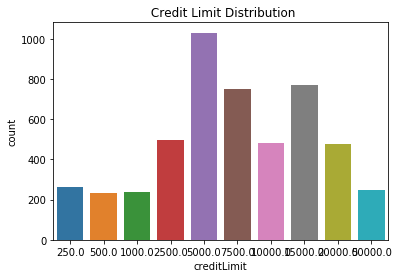

In [18]:
sns.countplot(x='creditLimit',data=Credit_df)
plt.title(" Credit Limit Distribution")
plt.show()

- The maximum credit being offered is 50,000 dollars.
- The minimum credit being offered is 250 dollars.

- 1031 customers have credit limit of 5000 dollars.
- 240  customers have credit limit of 1000 dollars.

The majority of the customers have credit limit less than 10,000 dollars.
 

### Converting features with dates into timestamps

In [19]:
nonechecker(df["transactionDateTime"])

No none objects found!


In [20]:
df["transactionDateTime"] = pd.to_datetime(df["transactionDateTime"] )
df["transactionDateTime"].describe() 

count                  786363
unique                 776637
top       2016-05-28 14:24:41
freq                        4
first     2016-01-01 00:01:02
last      2016-12-30 23:59:45
Name: transactionDateTime, dtype: object

The dataset has transactions data from 2016-01-01 to 2016-12-30.

In [21]:
nonechecker(df["accountOpenDate"])

No none objects found!


In [22]:
df["accountOpenDate"] = pd.to_datetime(df["accountOpenDate"] )
df["accountOpenDate"].describe() 


count                  786363
unique                   1820
top       2014-06-21 00:00:00
freq                    33623
first     1989-08-22 00:00:00
last      2015-12-31 00:00:00
Name: accountOpenDate, dtype: object

The oldest account opening date is 1989-08-22 and the latest account opening date is 2015-12-31.

In [23]:
nonechecker(df["dateOfLastAddressChange"])

No none objects found!


In [24]:
df["dateOfLastAddressChange"] = pd.to_datetime(df["dateOfLastAddressChange"] )
df["dateOfLastAddressChange"].describe() 

count                  786363
unique                   2184
top       2016-03-15 00:00:00
freq                     3819
first     1989-08-22 00:00:00
last      2016-12-30 00:00:00
Name: dateOfLastAddressChange, dtype: object

The last dates of address change ranges from 1989-08-22 to 2016-12-30

In [25]:
nonechecker(df["dateOfLastAddressChange"])

No none objects found!


In [26]:
df["currentExpDate"] = pd.to_datetime(df["currentExpDate"] )
df["currentExpDate"].describe()

count                  786363
unique                    165
top       2029-03-01 00:00:00
freq                     5103
first     2019-12-01 00:00:00
last      2033-08-01 00:00:00
Name: currentExpDate, dtype: object

The expiry dates ranges from 2019-12-01 to 2033-08-01

### Available Money

In [27]:
negativechecker(df.availableMoney)

2931 Negative values Found!


In [28]:
Avail_df= df[['customerId', 'transactionDateTime','availableMoney']].copy()
Avail_df=Avail_df.sort_values(['transactionDateTime'],ascending=False)
Avail_df = Avail_df.groupby('customerId').first()
Avail_df

,transactionDateTime,availableMoney
customerId,,
100088067,2016-12-28 12:27:09,49424.61
100108752,2016-12-16 16:42:20,4230.85
100328049,2016-12-28 19:04:41,4059.77
100663626,2016-12-29 21:54:38,14127.15
100737756,2016-12-23 09:42:31,119.23
...,...,...
999086814,2016-12-30 23:19:33,3987.23
999257059,2016-12-24 20:34:32,12151.49
999258704,2016-12-28 17:47:19,4233.76


In [29]:
Avail_df.availableMoney.describe()

count     5000.000000
mean      7700.381550
std       9958.518614
min       -375.230000
25%       1383.407500
50%       4598.520000
75%       9937.012500
max      50000.000000
Name: availableMoney, dtype: float64

In [30]:
num = df.availableMoney._get_numeric_data()
num[num < 0] = 0

This feature is inter related with the transaction dates. The available money information is valid only when it is the data of latest date. I have considered the transaction dates into consideration and observed -375 dollars as the minimum available money for one of the customer and 50000 dollars as the highest.

For my convinience I am considering all the negative available money as zeros. Intutively negative availablity is only possible when there is a transaction beyond the limit, replacing it with 0 however reflects this.
Then we have the 0 dollars as the minimum available money for one of the customer and 50000 dollars as the highest.

### Transaction Amount

In [31]:
negativechecker(df.transactionAmount)

No negative values found!


In [32]:
df.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

We can observe that the 75% of transactions are less than 200 dollars, the smallest transaction being 0 dollars and highest transaction being 2011 dollars.

### Identifying unique merchants and their overall revenue

In [33]:
nonechecker(df.merchantName)

No none objects found!


In [34]:
df.merchantName.value_counts()

Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Golds Gym #956354                    2
Sprint Communications #561941        2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: merchantName, Length: 2490, dtype: int64

In [35]:
len(df.merchantName.unique())

2490

Here we have 2490 merchants but few of the entries have their order number followed by the merchant's name which are to be reconsidered.

We can consider ignoring all the parts of the entries except for the alphabets.

In [36]:
df['merchantName'] = df['merchantName'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [37]:
df.merchantName.value_counts()

AMC                 37942
EZ Putt Putt        30712
Uber                25613
Lyft                25523
oldnavy             16992
                    ...  
TMobile Wireless       66
Verizon Wireless       45
ATT                    44
Duane Reed             28
My Fitness              7
Name: merchantName, Length: 204, dtype: int64

Finally we have 204 merchants in total!
Where we have AMC being the merchant with most transactions and My Fitness with least transactions.

In [38]:
merchant_trans= df[['transactionAmount','merchantName']].copy()
merchant_trans= merchant_trans.groupby(['merchantName'],as_index=False).sum()

In [39]:
merchant_trans.sort_values(by=['transactionAmount'],ascending=False)

,merchantName,transactionAmount
0,AMC,5572518.30
48,EZ Putt Putt,4474609.16
80,Lyft,3745033.12
143,Uber,3732112.83
194,staples,2469753.99
...,...,...
151,Verizon Wireless,4657.65
1,ATT,4101.28
46,Duane Reed,4069.21
9,Barbells,3705.42


AMC has the highest revenue from the given data and My Fitness has the lowest.

### Identifying Unique acqCountries

In [40]:
nonechecker(df.acqCountry)

4562 None objects Found!


In [41]:
df.acqCountry.value_counts()

US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

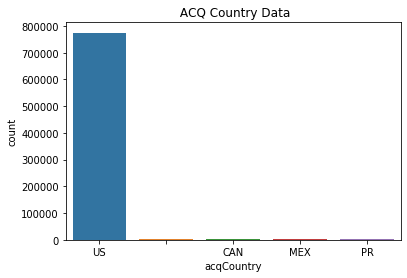

In [42]:
sns.countplot(x='acqCountry',data=df)
plt.title(" ACQ Country Data")
plt.show()

Here we observe that we have missing data for 4562 transactions.
Though we have missing data we cant ignore such records. In my view absence of ACQ might be a reflector of a fraud transaction.

### Merchant Country Code

In [43]:
nonechecker(df.merchantCountryCode)

724 None objects Found!


In [44]:
df.merchantCountryCode.value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64

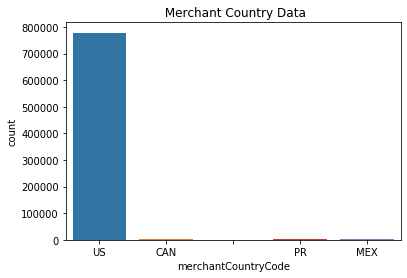

In [45]:
sns.countplot(x='merchantCountryCode',data=df)
plt.title(" Merchant Country Data")
plt.show()

724 transactions don't have merchant country code.
Though we have missing data we cant ignore such records. In my view absence of Merchant Country code might be a reflector of a fraud transaction.

### Pos Entry Mode

In [46]:
nonechecker(df.posEntryMode)

4054 None objects Found!


In [47]:
pos=df.posEntryMode.value_counts()
pos

05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: posEntryMode, dtype: int64

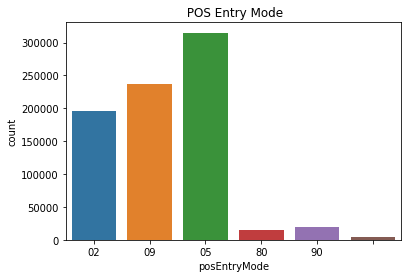

In [48]:
sns.countplot(x='posEntryMode',data=df)
plt.title(" POS Entry Mode")
plt.show()

We can observe that most of the transactions have 05,09,02 as their pos entry mode codes.
This feature provides more information about the type of card being used.

05 is the most frequently observed pos entry mode 80 being the least among the identified ones. 

We do not have pos entry mode information of 4054 transactions.

### POS Condition Code

In [49]:
nonechecker(df.posConditionCode)

409 None objects Found!


In [50]:
df.posConditionCode.value_counts()

01    628787
08    149634
99      7533
         409
Name: posConditionCode, dtype: int64

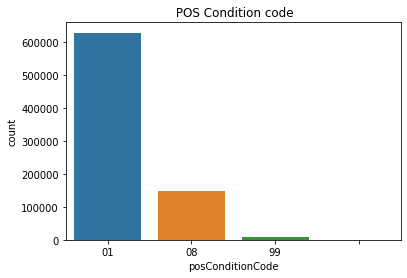

In [51]:
sns.countplot(x='posConditionCode',data=df)
plt.title(" POS Condition code")
plt.show()

This feature indicates transaction conditions at the point of sale or service. We donot have pos condition codes for 409 transactions.
01 is the most frequently observed transaction code with 628787 transactions, 99 being the least among the identified categories with 7533 transactions. 


### Merchant Category Code

In [52]:
nonechecker(df.merchantCategoryCode)

No none objects found!


In [53]:
df.merchantCategoryCode.value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

- We have 19 categories of merchants of them online_retail, fastfood, entertainment category merchants have highest number of transactions.
- Online retail has far more transactions than any other merchant category with 202156 transactions.
- Cable/phone has the least transactions with 1382.


### Card CVV and Entered CVV

In [54]:
nonechecker(df.cardCVV)

No none objects found!


In [55]:
nonechecker(df.enteredCVV)

No none objects found!


In [56]:
df['correct_cvv'] = df.apply(lambda row: row.cardCVV == row.enteredCVV, axis=1)
df=df.drop(columns=['cardCVV','enteredCVV'])

In [57]:
df.correct_cvv.value_counts()

True     779348
False      7015
Name: correct_cvv, dtype: int64

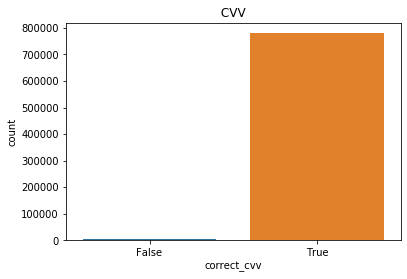

In [58]:
sns.countplot(x='correct_cvv',data=df)
plt.title(" CVV ")
plt.show()

These features when combined contribute to the find number of transactions in which the person using the card has given incorrect cvv. This can contribute for the identification of fraud transactions.
We have 7015 instances of cvv being entered wrong.

### Last 4 digits of Card

In [59]:
nonechecker(df.cardLast4Digits)

No none objects found!


In [60]:
df.cardLast4Digits.value_counts()

593     32946
2194    10867
6002    10172
6580     6747
8502     6553
        ...  
5703        1
9021        1
8417        1
7065        1
5972        1
Name: cardLast4Digits, Length: 5246, dtype: int64

Assuming that all the credit cards have last 4 digits unique :
Though we have 5000 unique customers, we have 5246 unique credit cards which show us that few customers have multiple cards.

### Current Balance

In [61]:
negativechecker(df.currentBalance)

No negative values found!


In [62]:
Current= df[['customerId', 'transactionDateTime','currentBalance']].copy()
Current=Current.sort_values(['transactionDateTime'],ascending=False)
Current = Current.groupby('customerId').first()
Current

,transactionDateTime,currentBalance
customerId,,
100088067,2016-12-28 12:27:09,575.39
100108752,2016-12-16 16:42:20,769.15
100328049,2016-12-28 19:04:41,940.23
100663626,2016-12-29 21:54:38,5872.85
100737756,2016-12-23 09:42:31,130.77
...,...,...
999086814,2016-12-30 23:19:33,6012.77
999257059,2016-12-24 20:34:32,2848.51
999258704,2016-12-28 17:47:19,766.24


In [63]:
Current.currentBalance.describe()

count     5000.000000
mean      2448.768450
std       3993.820145
min          0.000000
25%        197.777500
50%        974.820000
75%       3193.157500
max      45963.380000
Name: currentBalance, dtype: float64

The information about current balance only makes sense when we take latest transactions of each customer. Afetr finding the latest balances we observe that the highest current balance is 45,963 dollars and the least is 0 dollars.

### Transaction Type

In [64]:
nonechecker(df.transactionType)

698 None objects Found!


In [65]:
Transaction_type = df.transactionType.value_counts()
Transaction_type

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

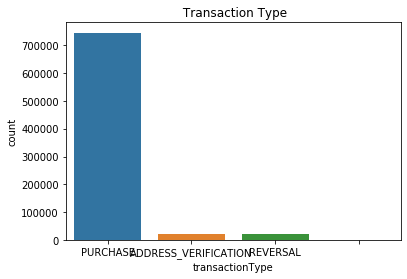

In [66]:
sns.countplot(x='transactionType',data=df)
plt.title(" Transaction Type")
plt.show()

- The transaction types give us valuable information about the reversal transactions in addition to purchase and verification types. We don't have transaction type iformation of 698 transactions.
- The purchase type of transactions have the highest number of transactions - 745193

### Card Present

In [67]:
nonechecker(df.cardPresent)

No none objects found!


In [68]:
card_p = df.cardPresent.value_counts()
card_p


False    433495
True     352868
Name: cardPresent, dtype: int64

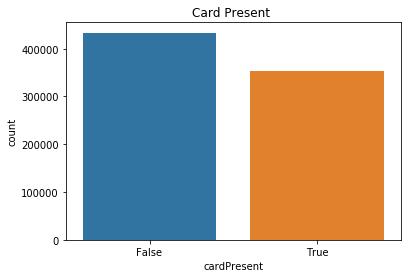

In [69]:
sns.countplot(x="cardPresent",data=df)
plt.title("Card Present ")
plt.show()

We observe that more than 50% of transactions are cardless.

### Expiry date and Key Match

In [70]:
nonechecker(df.expirationDateKeyInMatch)

No none objects found!


In [71]:
ex_k=df.expirationDateKeyInMatch.value_counts()
ex_k

False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64

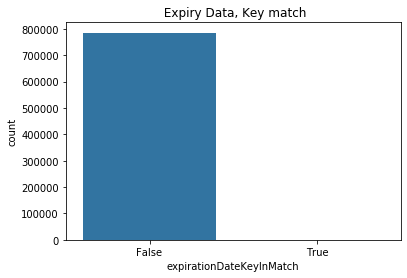

In [72]:
sns.countplot(x="expirationDateKeyInMatch",data=df)
plt.title(" Expiry Data, Key match")
plt.show()

This feature gives us hidden information which might compromise the security and make fraud transactions possible. We have 1043 transactions in which the expiration date and key are in match.

### Is Fraud

In [73]:
df.isFraud.value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

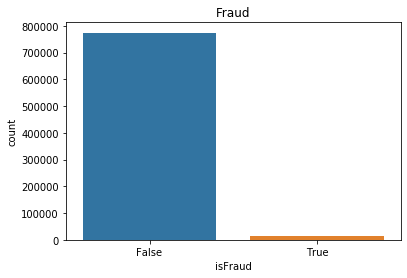

In [74]:
sns.countplot(x="isFraud",data=df)
plt.title('Fraud')
plt.show()

This Feature provides us with the information about the fraud transactions. We have 12417 fraud transactions by which we can conclude that for every 100 transactions we have 1.5 fraud transactions.

In [75]:
test= df[['cardPresent','expirationDateKeyInMatch', 'isFraud']]

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

encoder = LabelEncoder()
encoder.fit(test['isFraud'])
test['isFraud'] = encoder.transform(test['isFraud'])

Using TensorFlow backend.
C:\Users\saipr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [77]:
test.head()

,cardPresent,expirationDateKeyInMatch,isFraud
0,False,False,0
1,True,False,0
2,False,False,0
3,False,False,0
4,True,False,0


In [78]:
test = pd.get_dummies(test, columns=['cardPresent','expirationDateKeyInMatch'])

In [79]:
test.head()

,isFraud,cardPresent_False,cardPresent_True,expirationDateKeyInMatch_False,expirationDateKeyInMatch_True
0,0,1,0,1,0
1,0,0,1,1,0
2,0,1,0,1,0
3,0,1,0,1,0
4,0,0,1,1,0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = test.iloc[:,1:]  #independent columns
y = test.iloc[:,0] 
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X,y)
X_fs = fs.transform(X)

Feature 0: 665.194940
Feature 1: 817.185692
Feature 2: 0.000986
Feature 3: 0.742582


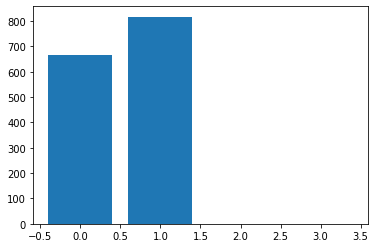

In [81]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [82]:
time_balance= df[['customerId','creditLimit','availableMoney','transactionDateTime','currentBalance']].copy()
time_balance= time_balance.groupby(['customerId'],as_index=False).max()
time_balance

,customerId,creditLimit,availableMoney,transactionDateTime,currentBalance
0,100088067,50000.0,50000.0,2016-12-28 12:27:09,1196.67
1,100108752,5000.0,5000.0,2016-12-16 16:42:20,769.15
2,100328049,5000.0,5000.0,2016-12-28 19:04:41,1318.63
3,100663626,20000.0,20000.0,2016-12-29 21:54:38,5872.85
4,100737756,250.0,250.0,2016-12-23 09:42:31,785.03
...,...,...,...,...,...
4995,999086814,10000.0,10000.0,2016-12-30 23:19:33,9496.95
4996,999257059,15000.0,15000.0,2016-12-24 20:34:32,2863.85
4997,999258704,5000.0,5000.0,2016-12-28 17:47:19,1032.03
4998,999283629,2500.0,2500.0,2016-12-30 17:21:07,2373.60


# Question 2

In [83]:
df.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

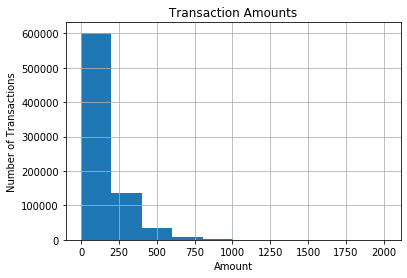

In [84]:
df.transactionAmount.hist()
plt.title(" Transaction Amounts ")
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()


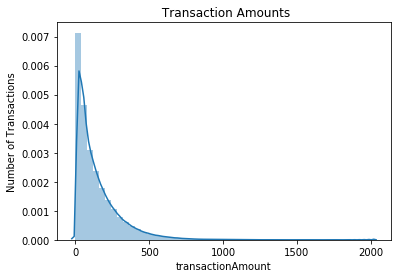

In [85]:
sns.distplot(df.transactionAmount)
plt.ylabel('Number of Transactions')
plt.title(" Transaction Amounts")
plt.show()

We can infer from the plots that we have highest number of transactions for lower amounts, the number of transactions decrease exponentially with the increase in the amount.

In [86]:
transactions_per_id= df[['customerId', 'transactionAmount']].copy()
transactions_per_id= transactions_per_id.groupby(['customerId'],as_index=False).sum()

In [87]:
transactions_per_id.transactionAmount.describe()

count    5.000000e+03
mean     2.154411e+04
std      9.517405e+04
min      0.000000e+00
25%      1.916815e+03
50%      5.587040e+03
75%      1.622263e+04
max      4.765004e+06
Name: transactionAmount, dtype: float64

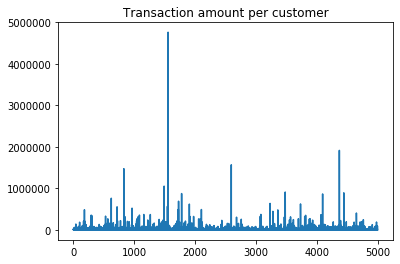

In [88]:
plt.plot(transactions_per_id.transactionAmount)
plt.title('Transaction amount per customer')
plt.show()

It is interesting to observe total transaction amounts of each customer. As we can see that there are substantial amount of customers whose total transactions sum up to 15000 dollars. but we can observe that there are outliers. The highest amount spent being a little less that 5 million dollars.

In [89]:
merchantcat_trans= df[['transactionAmount','merchantCategoryCode']].copy()
merchantcat_trans= merchantcat_trans.groupby(['merchantCategoryCode'],as_index=False).sum()

In [90]:
merchantcat_trans.sort_values(by=['transactionAmount'],ascending=False)

,merchantCategoryCode,transactionAmount
14,online_retail,29359445.70
4,fastfood,16326340.37
3,entertainment,11697647.62
5,food,10969746.77
13,online_gifts,9679096.78
17,rideshare,7477145.95
11,hotels,4964014.35
18,subscriptions,3364172.32
1,auto,3136025.87
16,personal care,2797510.06


When we combine the total tansaction data with merchant category we can see that online retail has highest revenue compared to all the other merchant categories.

## Question 3

To identify the duplicate transactions we create a new data frame with customer id , transaction amount, transaction type and transaction date features.

In [91]:
rev_dup= df[['customerId', 'transactionAmount','transactionType', 'transactionDateTime']]

In [92]:
rev_dup.transactionType.value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

we can see transaction type feature is a nominal categorical feature with few missing values. This can be converted into numeric format by implementing one hot encoding. Giving the benefit of doubt to the null values I considered them as one of the types.

In [93]:
rev_dup=pd.get_dummies(rev_dup,columns=['transactionType']) #Onehot Encoding

In [94]:
rev_dup.head()

,customerId,transactionAmount,transactionDateTime,transactionType_,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,737265056,98.55,2016-08-13 14:27:32,0,0,1,0
1,737265056,74.51,2016-10-11 05:05:54,0,0,1,0
2,737265056,7.47,2016-11-08 09:18:39,0,0,1,0
3,737265056,7.47,2016-12-10 02:14:50,0,0,1,0
4,830329091,71.18,2016-03-24 21:04:46,0,0,1,0


When we observe the transaction type feature we have entries indicating the reversed transactions.

In [95]:
ReversaltransactionAmount=np.sum(rev_dup.transactionType_REVERSAL*rev_dup.transactionAmount)
reversed_transactions=np.sum(rev_dup.transactionType_REVERSAL)

print("The total number of reversed transactions are:",reversed_transactions)
print("The total dollar amount for reversed transactions is:",ReversaltransactionAmount)

The total number of reversed transactions are: 20303
The total dollar amount for reversed transactions is: 2821792.4999999995


As per the information given we consider transaction to be a multiswipe transaction if the transactions are of same amount, of the same customer,with a very less time gap.

From the information about the transaction date and time we seperate the year,month,day,hour,min as seperate features to compare the time of two transactions ignoring the information about seconds.
It is intutive that the possibilty of having multiple transactions in a second is quite less. So, we ignore information about the seconds and take minutes as the samllest unit representing time 

In [96]:
date=pd.DataFrame({"year": rev_dup.transactionDateTime.dt.year,
              "month": rev_dup.transactionDateTime.dt.month,
              "day": rev_dup.transactionDateTime.dt.day,
              "hour": rev_dup.transactionDateTime.dt.hour,
              "min":rev_dup.transactionDateTime.dt.minute
             })

In [97]:
rev_dup=pd.concat([rev_dup,date], axis=1)
rev_dup=rev_dup.drop(columns='transactionDateTime')

In [98]:
new=rev_dup.groupby(['customerId','year','month','day','hour','min',"transactionAmount"]).size().reset_index(name='counts')
#grouping over the id,amount,date,time and taking counts of each entry
new.counts.value_counts()

1    781954
2      2185
3        13
Name: counts, dtype: int64

- We have 13 instances of 3 identical transactions of which two are duplicates.
- We have 2185 instances of 2 identical transactions of which one is duplicate
- We have a total of 2211 duplicate transactions.

But these values are not right indicators as there might be transactions which are both reversed and are also multiswipe. To avoid this we drop the records which are already identified as reversed transactions.

In [99]:
indexNames = rev_dup[ rev_dup['transactionType_REVERSAL'] == 1 ].index
 
rev_dup.drop(indexNames , inplace=True) #dropping entries which are identified as reversed transactions.

In [100]:
new=rev_dup.groupby(['customerId','year','month','day','hour','min',"transactionAmount"]).size().reset_index(name='counts')
#grouping over the id,amount,date,time and taking counts of each entry
new.counts.value_counts()

1    763542
2      1244
3        10
Name: counts, dtype: int64

- We have 10 instances of 3 identical transactions of which two are duplicates.
- We have 1244 instances of 2 identical transactions of which one is duplicate
- We have a total of 1264 duplicate transactions.

In [101]:
cond = new['counts']==3 # sperating transactions wih 2 duplicates
Three_multiswipe = new[cond]

In [102]:
three_trans_dup=np.sum(Three_multiswipe.transactionAmount)*2
three_dup_num = len(Three_multiswipe.transactionAmount)*2

In [103]:
cond1= new['counts']==2 # seperating transactions with 1 duplicate
Two_multiswipe=new[cond1]

In [104]:
two_trans_dup=np.sum(Two_multiswipe.transactionAmount)
two_dup_num = len(Two_multiswipe.transactionAmount)

In [105]:
total_multiswipe = three_trans_dup+ two_trans_dup
total_multiswipe_num = two_dup_num+ three_dup_num
total_duplicate = ReversaltransactionAmount + total_multiswipe
print(" Total Dollar amount for Multiswipe transactions:", total_multiswipe)
print(" Total number of Multiswipe transactions:", total_multiswipe_num)
print(" Total Dollar amount for Reversed transactions :",ReversaltransactionAmount)
print(" Total number of Reversed transactions :",reversed_transactions)
print(" Total Dollar amount for Duplicate transactions:",total_duplicate)
print(" Total number of Duplicate transactions :",reversed_transactions+total_multiswipe_num)

 Total Dollar amount for Multiswipe transactions: 190625.0
 Total number of Multiswipe transactions: 1264
 Total Dollar amount for Reversed transactions : 2821792.4999999995
 Total number of Reversed transactions : 20303
 Total Dollar amount for Duplicate transactions: 3012417.4999999995
 Total number of Duplicate transactions : 21567


## Question 4

To implement machine learning techniques we need to identify nominal and ordinal categorical variables

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 21 columns):
customerId                  786363 non-null object
creditLimit                 786363 non-null float64
availableMoney              786363 non-null float64
transactionDateTime         786363 non-null datetime64[ns]
transactionAmount           786363 non-null float64
merchantName                786363 non-null object
acqCountry                  786363 non-null object
merchantCountryCode         786363 non-null object
posEntryMode                786363 non-null object
posConditionCode            786363 non-null object
merchantCategoryCode        786363 non-null object
currentExpDate              786363 non-null datetime64[ns]
accountOpenDate             786363 non-null datetime64[ns]
dateOfLastAddressChange     786363 non-null datetime64[ns]
cardLast4Digits             786363 non-null object
transactionType             786363 non-null object
currentBalance              786363 non

In [107]:
Nominal_features=['creditLimit','merchantName','acqCountry','cardPresent','expirationDateKeyInMatch','merchantCategoryCode',
                  'merchantCountryCode','posEntryMode','posConditionCode','correct_cvv','transactionType']

In [108]:
df=pd.get_dummies(df,columns = Nominal_features)# One hot encoding the nominal categorical variables.

In [109]:
df.head()

,customerId,availableMoney,transactionDateTime,transactionAmount,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,currentBalance,isFraud,...,posConditionCode_,posConditionCode_01,posConditionCode_08,posConditionCode_99,correct_cvv_False,correct_cvv_True,transactionType_,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,737265056,5000.0,2016-08-13 14:27:32,98.55,2023-06-01,2015-03-14,2015-03-14,1803,0.0,False,...,0,1,0,0,0,1,0,0,1,0
1,737265056,5000.0,2016-10-11 05:05:54,74.51,2024-02-01,2015-03-14,2015-03-14,767,0.0,False,...,0,1,0,0,0,1,0,0,1,0
2,737265056,5000.0,2016-11-08 09:18:39,7.47,2025-08-01,2015-03-14,2015-03-14,767,0.0,False,...,0,1,0,0,0,1,0,0,1,0
3,737265056,5000.0,2016-12-10 02:14:50,7.47,2025-08-01,2015-03-14,2015-03-14,767,0.0,False,...,0,1,0,0,0,1,0,0,1,0
4,830329091,5000.0,2016-03-24 21:04:46,71.18,2029-10-01,2015-08-06,2015-08-06,3143,0.0,False,...,0,1,0,0,0,1,0,0,1,0


Considering the transaction time and date feature is tricky, they can't be neither considered to be continuous values nor ordinal categorical variable.For example, 24th January can't be considered to have higher value than 12th February. So we consider them as nominal categorical variables. By this I wan't to put forth my point that, there might be a specific time of the year or a specific day of a week where the number of fraud transactions is higher.

So we consider the month pf transaction and weekday of the transaction as seperate deatures and encode them.

In [110]:
date=pd.DataFrame({"month": df.transactionDateTime.dt.month,"weekday": df.transactionDateTime.dt.weekday})

In [111]:
df=pd.concat([df,date], axis=1)
df=df.drop(columns='transactionDateTime')

In [112]:
df=pd.get_dummies(df,columns=['month'])
df=pd.get_dummies(df,columns=['weekday'])

There are few features which don't contribute much to the prediction, we drop those features.

In [113]:
drop_features=['cardLast4Digits','customerId','currentExpDate','accountOpenDate','dateOfLastAddressChange']
df=df.drop(columns=drop_features)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Columns: 286 entries, availableMoney to weekday_6
dtypes: bool(1), float64(3), uint8(282)
memory usage: 230.2 MB


The isFraud feature can be considered as an ordinal categorical variable. So, we map occurences of True to 1 and False to 0

In [115]:
df['isFraud'] = df['isFraud'].map({False: 0,True: 1})

In [116]:
df.isFraud.value_counts()

0    773946
1     12417
Name: isFraud, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Columns: 286 entries, availableMoney to weekday_6
dtypes: float64(3), int64(1), uint8(282)
memory usage: 235.5 MB


### The Data Problem:

As we can see from the distribution of the isFraud feature which acts as our target variable y is very skewed. For every 100 not fraud transactions we have only 1 transaction being fraud.
This creates a huge imbalance between the categories, data of this sort is very deceptive if we take accuracy as the only metric.

To understand this behavior we can implement a basic classification model - Logistic Regression. In logistic regression the data is transformed into a different space and a line is fit into it classifying data into different classes and then transformed back.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as score
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [119]:
y = df.isFraud  
X= df.drop(['isFraud'],axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [120]:
from sklearn.linear_model import LogisticRegression

#model= LogisticRegression(solver='saga')
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


C:\Users\saipr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
print("Accuracy is: " ,accuracy_score(y_pred,y_test)*100,"%")
print('')
print(classification_report(y_pred,y_test))

Accuracy is:  98.4154940771779 %

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    157272
           1       0.00      1.00      0.00         1

    accuracy                           0.98    157273
   macro avg       0.50      0.99      0.50    157273
weighted avg       1.00      0.98      0.99    157273



### The Accuracy trap
Here we can see logistic regression model is giving us an accuracy of whopping 98% on the data without any preprocessing or scaling. The reason for this behavior is the anomalities in data. When we consider highly skewed data and try splitting it into 80:20 ratio of train and test datasets we get dataset in which a category is under represented.

In this case for every 100 not fraud transactions we have just 1 fraud transaction. When we observe the classification report we can see that there are 157272 transactions of not fraud and only one fraud transaction. It implies that the accuracy being given is nothing but the representation of majority class classification.
 
As a quick fix to this problem we can create a custom data set with equal number of data samples per each class and train our models on that dataset.

In [122]:
is_fraud=df[df.isFraud == 1]
not_fraud=df[df.isFraud ==0]

In [123]:
is_fraud.shape 

(12417, 286)

In [124]:
not_fraud= not_fraud.sample(n = 12417) #taking equal number of datasamples from majority class
#ot_fraud.describe()

In [125]:
k_data=is_fraud.append(not_fraud ) #creating a dataset with equal representation of both the classes  
data=is_fraud.append(not_fraud)
data.isFraud.value_counts()

1    12417
0    12417
Name: isFraud, dtype: int64

In [126]:
y = data.isFraud  
X= data.drop(['isFraud'],axis=1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here we can observe that each feature has their own range of values, for our convinience we scale down all the features to have vlaues between 0 and 1. This helps our models to converge faster and perform better.

In [128]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

### Logistic Regression on the new unbiased dataset

In [129]:
#model= LogisticRegression(solver='saga')
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\saipr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
print("Accuracy is: " ,accuracy_score(y_pred,y_test)*100,"%")
print('')
print(classification_report(y_pred,y_test))

Accuracy is:  69.92148177974633 %

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      2182
           1       0.76      0.68      0.72      2785

    accuracy                           0.70      4967
   macro avg       0.70      0.70      0.70      4967
weighted avg       0.71      0.70      0.70      4967



Here we have an accuracy of around 70%.

### Decision Tree:

Decision Tree unlike Neural Network is a white box type i.e, we can interpret the logic inside the decisions. A decision tree basically comprises of decision nodes and leaf nodes worked along with heuristics and cost function to predict an outcome.

In general a decision tree takes the data and splits it by giving scores to each feature it can be done by different algorithms, but the decision tree classifier i used uses Gini Index,it considers a binary split for each attribute.

A decision tree takes the features and selects the best attribute to split the data further.It makes the best attribute as the decision node and cleaves the data into smaller units, this process in done recursively untlil there are no more attributes, In the decision tree each internal node splits data based on the decision rule and measures the purity of the node, then decides which node to navigate next based on the condition. Once the leaf node is reached, an output is predicted.

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred=tree.predict(X_test)

In [132]:
print("Accuracy is: " ,accuracy_score(ypred,y_test)*100,"%")
print('')
print(classification_report(ypred,y_test))

Accuracy is:  63.98228306825045 %

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      2459
           1       0.64      0.64      0.64      2508

    accuracy                           0.64      4967
   macro avg       0.64      0.64      0.64      4967
weighted avg       0.64      0.64      0.64      4967



The performance of the decision tree is quite poor on this data, we can try improving its performance by using boosting. In boosting each tree is dependant on its previous trees leading to a slight increse in its accuracy.

### Random Forest:

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [133]:
from sklearn.ensemble import RandomForestRegressor

def r_forest(n, X_train, y_train, X_test):
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [134]:
accuracy={}
predictions=[]
n_estimators = [5,10,15,20,25,30,40,50,75,100,200,300]
for n in n_estimators:
    y_pred=r_forest(n, X_train, y_train, X_test)
    
    for i  in range(len(y_pred)):
        if y_pred[i]>=0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
        
    predictions.append(y_pred)
    
    accuracy[n] = accuracy_score(y_test, y_pred)
    #print(accuracy[n])

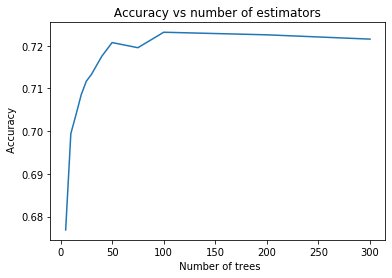

In [135]:
plt.plot(*zip(*sorted(accuracy.items())))
plt.title(" Accuracy vs number of estimators ")
plt.xlabel(" Number of trees")
plt.ylabel(" Accuracy")
plt.show()

In [136]:
print (" The highest accuracy observed is : ",max(accuracy.values())*100)

 The highest accuracy observed is :  72.3172941413328


### Neural Network:

I have implemented two versions of neural networks one with 2 hidden layers and the other with a single hidden layer. The model with the single hidden layer showed better performance due to the shortage of data. I have chosen Adam optimizer as my loss function. I have chosen ReLu activation to avoid any issues of vanishing gradient. In my view neural network would be an overkill for the subset of data I’m working on. 
In the first version I implemented a neural network with 30,60 units in hidden layers respectively.  In the second version I implemented a neural network with a single hidden layer of 40 units with learning rate of 0.0001.


In [137]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

def NN(X_train, y_train,X_test,epoch):
    accuracyscores={}
    model = Sequential([Dropout(0.2, input_shape=(285,)),
                                Dense(40, activation='relu', input_shape=(285,)),
                                #Dense(30, activation='relu'),
                                Dense(1, activation='sigmoid'),
                            ])

    opt = Adam(lr=0.0001)
    model.compile( optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(  X_train,  y_train,  epochs=epoch,  batch_size=25)
    y_pred=model.predict(X_test)
    #print('a',y_pred)
    return y_pred
       

In [138]:
accuracy={}
predictions=[]
epochs=[10,50,100,150,200,500]
for epoch in epochs:
    y_pred=NN(X_train, y_train, X_test, epoch)
    
    for i  in range(len(y_pred)):
        if y_pred[i]>=0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
        
    predictions.append(y_pred)
    
    accuracy[epoch] = accuracy_score(y_test, y_pred)
    print(accuracy[epoch])
       
    




Epoch 1/10
19867/19867 [==============================] - 2s 76us/step - loss: 0.6745 - accuracy: 0.5907
Epoch 2/10
19867/19867 [==============================] - 1s 65us/step - loss: 0.6434 - accuracy: 0.6448
Epoch 3/10
19867/19867 [==============================] - 1s 50us/step - loss: 0.6259 - accuracy: 0.6627
Epoch 4/10
19867/19867 [==============================] - 1s 50us/step - loss: 0.6139 - accuracy: 0.6690
Epoch 5/10
19867/19867 [==============================] - 1s 51us/step - loss: 0.6032 - accuracy: 0.6766
Epoch 6/10
19867/19867 [==============================] - 1s 51us/step - loss: 0.5997 - accuracy: 0.6741
Epoch 7/10
19867/19867 [==============================] - 1s 50us/step - loss: 0.5925 - accuracy: 0.6818
Epoch 8/10
19867/19867 [==============================] - 1s 51us/step - loss: 0.5884 - accuracy: 0.6826
Epoch 9/10
19867/19867 [==============================] - 1s 50us/step - loss: 0.5859 - accuracy: 0.6817
Epoch 10/10
19867/19867 [==============================

19867/19867 [==============================] - 2s 80us/step - loss: 0.5767 - accuracy: 0.6867
Epoch 18/100
19867/19867 [==============================] - 1s 58us/step - loss: 0.5780 - accuracy: 0.6852
Epoch 19/100
19867/19867 [==============================] - 1s 63us/step - loss: 0.5732 - accuracy: 0.6900
Epoch 20/100
19867/19867 [==============================] - 1s 61us/step - loss: 0.5734 - accuracy: 0.6927
Epoch 21/100
19867/19867 [==============================] - 1s 61us/step - loss: 0.5723 - accuracy: 0.6901
Epoch 22/100
19867/19867 [==============================] - 1s 49us/step - loss: 0.5718 - accuracy: 0.6919
Epoch 23/100
19867/19867 [==============================] - 1s 47us/step - loss: 0.5690 - accuracy: 0.6951
Epoch 24/100
19867/19867 [==============================] - 1s 47us/step - loss: 0.5715 - accuracy: 0.6928
Epoch 25/100
19867/19867 [==============================] - 1s 47us/step - loss: 0.5694 - accuracy: 0.6929
Epoch 26/100
19867/19867 [========================

19867/19867 [==============================] - 1s 47us/step - loss: 0.5316 - accuracy: 0.7245
Epoch 93/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5307 - accuracy: 0.7253
Epoch 94/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5307 - accuracy: 0.7249
Epoch 95/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5305 - accuracy: 0.7270
Epoch 96/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5341 - accuracy: 0.7246
Epoch 97/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5288 - accuracy: 0.7232
Epoch 98/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5315 - accuracy: 0.7211
Epoch 99/100
19867/19867 [==============================] - 1s 47us/step - loss: 0.5294 - accuracy: 0.7281 0s - loss: 0.531
Epoch 100/100
19867/19867 [==============================] - 1s 46us/step - loss: 0.5277 - accuracy: 0.7276
0.7332393799073887
Epoch 1/150
1

19867/19867 [==============================] - 1s 54us/step - loss: 0.5470 - accuracy: 0.7133
Epoch 68/150
19867/19867 [==============================] - 1s 51us/step - loss: 0.5478 - accuracy: 0.7123
Epoch 69/150
19867/19867 [==============================] - 1s 58us/step - loss: 0.5440 - accuracy: 0.7178
Epoch 70/150
19867/19867 [==============================] - 1s 49us/step - loss: 0.5450 - accuracy: 0.7170
Epoch 71/150
19867/19867 [==============================] - 1s 48us/step - loss: 0.5462 - accuracy: 0.7131
Epoch 72/150
19867/19867 [==============================] - 1s 52us/step - loss: 0.5461 - accuracy: 0.7126
Epoch 73/150
19867/19867 [==============================] - 1s 56us/step - loss: 0.5450 - accuracy: 0.7119
Epoch 74/150
19867/19867 [==============================] - 1s 52us/step - loss: 0.5438 - accuracy: 0.7133
Epoch 75/150
19867/19867 [==============================] - 1s 52us/step - loss: 0.5438 - accuracy: 0.7156
Epoch 76/150
19867/19867 [========================

19867/19867 [==============================] - 2s 81us/step - loss: 0.5182 - accuracy: 0.7339
Epoch 143/150
19867/19867 [==============================] - 2s 85us/step - loss: 0.5153 - accuracy: 0.7355
Epoch 144/150
19867/19867 [==============================] - 1s 66us/step - loss: 0.5175 - accuracy: 0.7340
Epoch 145/150
19867/19867 [==============================] - 1s 59us/step - loss: 0.5186 - accuracy: 0.7370
Epoch 146/150
19867/19867 [==============================] - 1s 62us/step - loss: 0.5152 - accuracy: 0.7357
Epoch 147/150
19867/19867 [==============================] - 2s 76us/step - loss: 0.5183 - accuracy: 0.7345
Epoch 148/150
19867/19867 [==============================] - 1s 61us/step - loss: 0.5185 - accuracy: 0.7320
Epoch 149/150
19867/19867 [==============================] - 1s 59us/step - loss: 0.5172 - accuracy: 0.7336
Epoch 150/150
19867/19867 [==============================] - 1s 66us/step - loss: 0.5174 - accuracy: 0.7347
0.7320314072881015
Epoch 1/200
19867/19867

19867/19867 [==============================] - 1s 48us/step - loss: 0.5420 - accuracy: 0.7191
Epoch 69/200
19867/19867 [==============================] - 1s 48us/step - loss: 0.5402 - accuracy: 0.7183
Epoch 70/200
19867/19867 [==============================] - 1s 48us/step - loss: 0.5421 - accuracy: 0.7163
Epoch 71/200
19867/19867 [==============================] - 1s 52us/step - loss: 0.5404 - accuracy: 0.7193
Epoch 72/200
19867/19867 [==============================] - 1s 53us/step - loss: 0.5398 - accuracy: 0.7183
Epoch 73/200
19867/19867 [==============================] - 1s 49us/step - loss: 0.5388 - accuracy: 0.7176
Epoch 74/200
19867/19867 [==============================] - 1s 49us/step - loss: 0.5374 - accuracy: 0.7187
Epoch 75/200
19867/19867 [==============================] - 1s 49us/step - loss: 0.5379 - accuracy: 0.7215
Epoch 76/200
19867/19867 [==============================] - 1s 49us/step - loss: 0.5362 - accuracy: 0.7247
Epoch 77/200
19867/19867 [========================

19867/19867 [==============================] - 1s 57us/step - loss: 0.5135 - accuracy: 0.7399
Epoch 144/200
19867/19867 [==============================] - 2s 78us/step - loss: 0.5136 - accuracy: 0.7377
Epoch 145/200
19867/19867 [==============================] - 2s 79us/step - loss: 0.5171 - accuracy: 0.7346
Epoch 146/200
19867/19867 [==============================] - 1s 62us/step - loss: 0.5150 - accuracy: 0.7384
Epoch 147/200
19867/19867 [==============================] - 1s 57us/step - loss: 0.5132 - accuracy: 0.7378
Epoch 148/200
19867/19867 [==============================] - 1s 56us/step - loss: 0.5125 - accuracy: 0.7387
Epoch 149/200
19867/19867 [==============================] - 1s 56us/step - loss: 0.5159 - accuracy: 0.7370
Epoch 150/200
19867/19867 [==============================] - 1s 57us/step - loss: 0.5136 - accuracy: 0.7371
Epoch 151/200
19867/19867 [==============================] - 1s 57us/step - loss: 0.5093 - accuracy: 0.7367
Epoch 152/200
19867/19867 [===============

19867/19867 [==============================] - 1s 58us/step - loss: 0.5783 - accuracy: 0.6845
Epoch 20/500
19867/19867 [==============================] - 1s 56us/step - loss: 0.5744 - accuracy: 0.6892
Epoch 21/500
19867/19867 [==============================] - 1s 56us/step - loss: 0.5725 - accuracy: 0.6929
Epoch 22/500
19867/19867 [==============================] - 1s 56us/step - loss: 0.5731 - accuracy: 0.6908
Epoch 23/500
19867/19867 [==============================] - 1s 62us/step - loss: 0.5719 - accuracy: 0.6938
Epoch 24/500
19867/19867 [==============================] - 1s 58us/step - loss: 0.5725 - accuracy: 0.6891
Epoch 25/500
19867/19867 [==============================] - 1s 59us/step - loss: 0.5700 - accuracy: 0.6938
Epoch 26/500
19867/19867 [==============================] - 1s 57us/step - loss: 0.5696 - accuracy: 0.6958
Epoch 27/500
19867/19867 [==============================] - 1s 57us/step - loss: 0.5683 - accuracy: 0.6955
Epoch 28/500
19867/19867 [========================

19867/19867 [==============================] - 1s 60us/step - loss: 0.5363 - accuracy: 0.7190
Epoch 96/500
19867/19867 [==============================] - 1s 58us/step - loss: 0.5320 - accuracy: 0.7276
Epoch 97/500
19867/19867 [==============================] - 1s 59us/step - loss: 0.5345 - accuracy: 0.7211
Epoch 98/500
19867/19867 [==============================] - 1s 58us/step - loss: 0.5331 - accuracy: 0.7220
Epoch 99/500
19867/19867 [==============================] - 1s 59us/step - loss: 0.5333 - accuracy: 0.7234
Epoch 100/500
19867/19867 [==============================] - 1s 59us/step - loss: 0.5315 - accuracy: 0.7220
Epoch 101/500
19867/19867 [==============================] - 1s 59us/step - loss: 0.5346 - accuracy: 0.7212
Epoch 102/500
19867/19867 [==============================] - 1s 58us/step - loss: 0.5310 - accuracy: 0.7266
Epoch 103/500
19867/19867 [==============================] - 1s 58us/step - loss: 0.5294 - accuracy: 0.7246
Epoch 104/500
19867/19867 [===================

19867/19867 [==============================] - 1s 50us/step - loss: 0.5106 - accuracy: 0.7390
Epoch 171/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.5094 - accuracy: 0.7385
Epoch 172/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.5110 - accuracy: 0.7396
Epoch 173/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.5119 - accuracy: 0.7375
Epoch 174/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.5113 - accuracy: 0.7358
Epoch 175/500
19867/19867 [==============================] - 1s 47us/step - loss: 0.5079 - accuracy: 0.7388
Epoch 176/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.5106 - accuracy: 0.7370
Epoch 177/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.5080 - accuracy: 0.7401
Epoch 178/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.5104 - accuracy: 0.7406
Epoch 179/500
19867/19867 [===============

Epoch 246/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4939 - accuracy: 0.7535
Epoch 247/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4979 - accuracy: 0.7460
Epoch 248/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4971 - accuracy: 0.7469
Epoch 249/500
19867/19867 [==============================] - 1s 54us/step - loss: 0.4980 - accuracy: 0.7471
Epoch 250/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4957 - accuracy: 0.7492
Epoch 251/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.5001 - accuracy: 0.7480
Epoch 252/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4975 - accuracy: 0.7470
Epoch 253/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4949 - accuracy: 0.7520
Epoch 254/500
19867/19867 [==============================] - 1s 54us/step - loss: 0.4919 - accuracy: 0.7539
Epoch 255/500
19867/19867 [=

19867/19867 [==============================] - 1s 48us/step - loss: 0.4849 - accuracy: 0.7579
Epoch 322/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4839 - accuracy: 0.7570
Epoch 323/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4873 - accuracy: 0.7523
Epoch 324/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4853 - accuracy: 0.7550
Epoch 325/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4832 - accuracy: 0.7556
Epoch 326/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4847 - accuracy: 0.7590
Epoch 327/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4846 - accuracy: 0.7543
Epoch 328/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4851 - accuracy: 0.7547
Epoch 329/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4859 - accuracy: 0.7553
Epoch 330/500
19867/19867 [===============

19867/19867 [==============================] - 1s 49us/step - loss: 0.4764 - accuracy: 0.7625
Epoch 397/500
19867/19867 [==============================] - 1s 52us/step - loss: 0.4787 - accuracy: 0.7574
Epoch 398/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4767 - accuracy: 0.7584
Epoch 399/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4762 - accuracy: 0.7606
Epoch 400/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4778 - accuracy: 0.7596
Epoch 401/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4758 - accuracy: 0.7639
Epoch 402/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4741 - accuracy: 0.7619
Epoch 403/500
19867/19867 [==============================] - 1s 48us/step - loss: 0.4767 - accuracy: 0.7620
Epoch 404/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4731 - accuracy: 0.7649
Epoch 405/500
19867/19867 [===============

19867/19867 [==============================] - 1s 66us/step - loss: 0.4706 - accuracy: 0.7644
Epoch 471/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4723 - accuracy: 0.7680
Epoch 472/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4668 - accuracy: 0.7693
Epoch 473/500
19867/19867 [==============================] - 1s 68us/step - loss: 0.4706 - accuracy: 0.7617
Epoch 474/500
19867/19867 [==============================] - 1s 65us/step - loss: 0.4765 - accuracy: 0.7612
Epoch 475/500
19867/19867 [==============================] - 1s 52us/step - loss: 0.4681 - accuracy: 0.7675
Epoch 476/500
19867/19867 [==============================] - 1s 50us/step - loss: 0.4702 - accuracy: 0.7664
Epoch 477/500
19867/19867 [==============================] - 1s 49us/step - loss: 0.4705 - accuracy: 0.7674
Epoch 478/500
19867/19867 [==============================] - 1s 51us/step - loss: 0.4699 - accuracy: 0.7658
Epoch 479/500
19867/19867 [===============

19867/19867 [==============================] - 1s 62us/step - loss: 0.5585 - accuracy: 0.7073
Epoch 46/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.5545 - accuracy: 0.7086
Epoch 47/1000
19867/19867 [==============================] - 1s 60us/step - loss: 0.5549 - accuracy: 0.7071
Epoch 48/1000
19867/19867 [==============================] - 1s 73us/step - loss: 0.5553 - accuracy: 0.7066
Epoch 49/1000
19867/19867 [==============================] - 1s 74us/step - loss: 0.5532 - accuracy: 0.7081
Epoch 50/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.5530 - accuracy: 0.7078
Epoch 51/1000
19867/19867 [==============================] - 1s 52us/step - loss: 0.5526 - accuracy: 0.7116
Epoch 52/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.5507 - accuracy: 0.7145
Epoch 53/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.5504 - accuracy: 0.7108
Epoch 54/1000
19867/19867 [===============

19867/19867 [==============================] - 1s 51us/step - loss: 0.5194 - accuracy: 0.7306
Epoch 121/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.5208 - accuracy: 0.7307
Epoch 122/1000
19867/19867 [==============================] - 1s 49us/step - loss: 0.5216 - accuracy: 0.7351
Epoch 123/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.5199 - accuracy: 0.7324
Epoch 124/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.5235 - accuracy: 0.7279
Epoch 125/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.5197 - accuracy: 0.7325
Epoch 126/1000
19867/19867 [==============================] - 1s 52us/step - loss: 0.5248 - accuracy: 0.7319
Epoch 127/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.5216 - accuracy: 0.7292
Epoch 128/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.5199 - accuracy: 0.7340
Epoch 129/1000
19867/19867 [======

19867/19867 [==============================] - 1s 50us/step - loss: 0.5040 - accuracy: 0.7437
Epoch 196/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.5037 - accuracy: 0.7450
Epoch 197/1000
19867/19867 [==============================] - 1s 47us/step - loss: 0.5043 - accuracy: 0.7407
Epoch 198/1000
19867/19867 [==============================] - 1s 48us/step - loss: 0.5009 - accuracy: 0.7459
Epoch 199/1000
19867/19867 [==============================] - 1s 49us/step - loss: 0.5042 - accuracy: 0.7413
Epoch 200/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.5008 - accuracy: 0.7460
Epoch 201/1000
19867/19867 [==============================] - 1s 48us/step - loss: 0.5043 - accuracy: 0.7435
Epoch 202/1000
19867/19867 [==============================] - 1s 49us/step - loss: 0.5029 - accuracy: 0.7429
Epoch 203/1000
19867/19867 [==============================] - 1s 49us/step - loss: 0.5002 - accuracy: 0.7464
Epoch 204/1000
19867/19867 [======

19867/19867 [==============================] - 1s 51us/step - loss: 0.4897 - accuracy: 0.7521
Epoch 270/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.4883 - accuracy: 0.7545
Epoch 271/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.4914 - accuracy: 0.7504
Epoch 272/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.4920 - accuracy: 0.7517
Epoch 273/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.4883 - accuracy: 0.7553
Epoch 274/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.4866 - accuracy: 0.7537
Epoch 275/1000
19867/19867 [==============================] - 1s 50us/step - loss: 0.4922 - accuracy: 0.7516
Epoch 276/1000
19867/19867 [==============================] - 1s 49us/step - loss: 0.4900 - accuracy: 0.7521
Epoch 277/1000
19867/19867 [==============================] - 1s 51us/step - loss: 0.4885 - accuracy: 0.7510
Epoch 278/1000
19867/19867 [======

19867/19867 [==============================] - 1s 67us/step - loss: 0.4832 - accuracy: 0.7534
Epoch 345/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4779 - accuracy: 0.7613
Epoch 346/1000
19867/19867 [==============================] - 1s 68us/step - loss: 0.4795 - accuracy: 0.7583
Epoch 347/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4814 - accuracy: 0.7570
Epoch 348/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4780 - accuracy: 0.7606
Epoch 349/1000
19867/19867 [==============================] - 1s 69us/step - loss: 0.4825 - accuracy: 0.7539
Epoch 350/1000
19867/19867 [==============================] - 1s 61us/step - loss: 0.4776 - accuracy: 0.7630
Epoch 351/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4837 - accuracy: 0.7551
Epoch 352/1000
19867/19867 [==============================] - 1s 69us/step - loss: 0.4826 - accuracy: 0.7563
Epoch 353/1000
19867/19867 [======

19867/19867 [==============================] - 2s 89us/step - loss: 0.4743 - accuracy: 0.7617
Epoch 420/1000
19867/19867 [==============================] - 2s 90us/step - loss: 0.4701 - accuracy: 0.7654
Epoch 421/1000
19867/19867 [==============================] - 2s 88us/step - loss: 0.4716 - accuracy: 0.7647
Epoch 422/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4743 - accuracy: 0.7618
Epoch 423/1000
19867/19867 [==============================] - 1s 61us/step - loss: 0.4753 - accuracy: 0.7638
Epoch 424/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4751 - accuracy: 0.7630
Epoch 425/1000
19867/19867 [==============================] - 1s 61us/step - loss: 0.4743 - accuracy: 0.7619
Epoch 426/1000
19867/19867 [==============================] - 1s 60us/step - loss: 0.4777 - accuracy: 0.7604
Epoch 427/1000
19867/19867 [==============================] - 1s 60us/step - loss: 0.4748 - accuracy: 0.7604
Epoch 428/1000
19867/19867 [======

19867/19867 [==============================] - 1s 65us/step - loss: 0.4657 - accuracy: 0.7659
Epoch 495/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4692 - accuracy: 0.7649
Epoch 496/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4701 - accuracy: 0.7649
Epoch 497/1000
19867/19867 [==============================] - 1s 61us/step - loss: 0.4718 - accuracy: 0.7623
Epoch 498/1000
19867/19867 [==============================] - 1s 61us/step - loss: 0.4666 - accuracy: 0.7672
Epoch 499/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4684 - accuracy: 0.7665
Epoch 500/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4661 - accuracy: 0.7651
Epoch 501/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4677 - accuracy: 0.7651
Epoch 502/1000
19867/19867 [==============================] - 2s 100us/step - loss: 0.4675 - accuracy: 0.7678
Epoch 503/1000
19867/19867 [=====

19867/19867 [==============================] - 1s 58us/step - loss: 0.4650 - accuracy: 0.7709
Epoch 569/1000
19867/19867 [==============================] - 1s 56us/step - loss: 0.4638 - accuracy: 0.7688
Epoch 570/1000
19867/19867 [==============================] - 1s 54us/step - loss: 0.4645 - accuracy: 0.7682
Epoch 571/1000
19867/19867 [==============================] - 1s 60us/step - loss: 0.4638 - accuracy: 0.7692
Epoch 572/1000
19867/19867 [==============================] - 1s 70us/step - loss: 0.4624 - accuracy: 0.7689
Epoch 573/1000
19867/19867 [==============================] - 2s 86us/step - loss: 0.4641 - accuracy: 0.7659
Epoch 574/1000
19867/19867 [==============================] - 1s 69us/step - loss: 0.4623 - accuracy: 0.7711
Epoch 575/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4614 - accuracy: 0.7689
Epoch 576/1000
19867/19867 [==============================] - 1s 60us/step - loss: 0.4649 - accuracy: 0.7677
Epoch 577/1000
19867/19867 [======

19867/19867 [==============================] - 4s 186us/step - loss: 0.4582 - accuracy: 0.7711
Epoch 644/1000
19867/19867 [==============================] - 2s 101us/step - loss: 0.4593 - accuracy: 0.7666
Epoch 645/1000
19867/19867 [==============================] - 4s 177us/step - loss: 0.4582 - accuracy: 0.7721
Epoch 646/1000
19867/19867 [==============================] - 3s 146us/step - loss: 0.4628 - accuracy: 0.7667
Epoch 647/1000
19867/19867 [==============================] - 3s 137us/step - loss: 0.4573 - accuracy: 0.7704
Epoch 648/1000
19867/19867 [==============================] - 1s 74us/step - loss: 0.4603 - accuracy: 0.7705
Epoch 649/1000
19867/19867 [==============================] - 1s 72us/step - loss: 0.4630 - accuracy: 0.7690
Epoch 650/1000
19867/19867 [==============================] - 1s 69us/step - loss: 0.4578 - accuracy: 0.7700
Epoch 651/1000
19867/19867 [==============================] - 1s 69us/step - loss: 0.4639 - accuracy: 0.7687
Epoch 652/1000
19867/19867 [=

19867/19867 [==============================] - 1s 68us/step - loss: 0.4562 - accuracy: 0.7741
Epoch 719/1000
19867/19867 [==============================] - 1s 67us/step - loss: 0.4558 - accuracy: 0.7745
Epoch 720/1000
19867/19867 [==============================] - 1s 66us/step - loss: 0.4592 - accuracy: 0.7714
Epoch 721/1000
19867/19867 [==============================] - 1s 67us/step - loss: 0.4566 - accuracy: 0.7706
Epoch 722/1000
19867/19867 [==============================] - 2s 84us/step - loss: 0.4533 - accuracy: 0.7737
Epoch 723/1000
19867/19867 [==============================] - 1s 72us/step - loss: 0.4579 - accuracy: 0.7694
Epoch 724/1000
19867/19867 [==============================] - 1s 67us/step - loss: 0.4528 - accuracy: 0.7744
Epoch 725/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4576 - accuracy: 0.7723
Epoch 726/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4562 - accuracy: 0.7728
Epoch 727/1000
19867/19867 [======

19867/19867 [==============================] - 1s 64us/step - loss: 0.4501 - accuracy: 0.7781
Epoch 794/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4539 - accuracy: 0.7751
Epoch 795/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4541 - accuracy: 0.7723
Epoch 796/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4535 - accuracy: 0.7750
Epoch 797/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4521 - accuracy: 0.7725
Epoch 798/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4546 - accuracy: 0.7738
Epoch 799/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4521 - accuracy: 0.7766
Epoch 800/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4526 - accuracy: 0.7723
Epoch 801/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4528 - accuracy: 0.7766
Epoch 802/1000
19867/19867 [======

19867/19867 [==============================] - 1s 65us/step - loss: 0.4545 - accuracy: 0.7705
Epoch 869/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4522 - accuracy: 0.7739
Epoch 870/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4525 - accuracy: 0.7746
Epoch 871/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4524 - accuracy: 0.7733
Epoch 872/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4496 - accuracy: 0.7750
Epoch 873/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4479 - accuracy: 0.7757
Epoch 874/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4513 - accuracy: 0.7758
Epoch 875/1000
19867/19867 [==============================] - 1s 63us/step - loss: 0.4489 - accuracy: 0.7790
Epoch 876/1000
19867/19867 [==============================] - 1s 62us/step - loss: 0.4547 - accuracy: 0.7725
Epoch 877/1000
19867/19867 [======

19867/19867 [==============================] - 1s 63us/step - loss: 0.4497 - accuracy: 0.7746
Epoch 944/1000
19867/19867 [==============================] - 1s 64us/step - loss: 0.4473 - accuracy: 0.7776
Epoch 945/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4494 - accuracy: 0.7761
Epoch 946/1000
19867/19867 [==============================] - 1s 57us/step - loss: 0.4536 - accuracy: 0.7712
Epoch 947/1000
19867/19867 [==============================] - 1s 65us/step - loss: 0.4445 - accuracy: 0.7807
Epoch 948/1000
19867/19867 [==============================] - 2s 82us/step - loss: 0.4476 - accuracy: 0.7754
Epoch 949/1000
19867/19867 [==============================] - 1s 56us/step - loss: 0.4476 - accuracy: 0.7782
Epoch 950/1000
19867/19867 [==============================] - 1s 55us/step - loss: 0.4488 - accuracy: 0.7771
Epoch 951/1000
19867/19867 [==============================] - 1s 56us/step - loss: 0.4531 - accuracy: 0.7730
Epoch 952/1000
19867/19867 [======

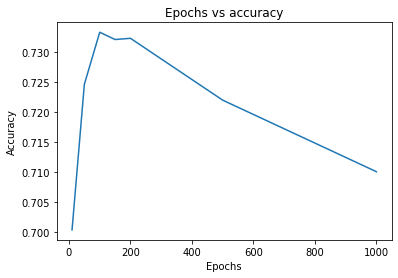

In [139]:
plt.plot(*zip(*sorted(accuracy.items())))
plt.title("Epochs vs accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [140]:
print (" The highest accuracy observed is : ",max(accuracy.values())*100)

 The highest accuracy observed is :  73.32393799073887


Here we see that accuracy decreases with increase in number of epochs due to overfitting.